First let's generate a few random points on a 2D plane.

We have to import a few things, namely:
- numpy for generating random numbers
- matplotlib.pyplot for plotting
- cv2 for image processing
- io for reading and writing files into memory
- scipy.spatial for calculating the Voronoi diagram

In [21]:
import cv2
import io
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
np.random.seed(0)
rng = np.random.default_rng()

Let's setup our figures. We're gonna need 3 subplots:
- the base image
- openCV processing output
- Voronoi diagram.

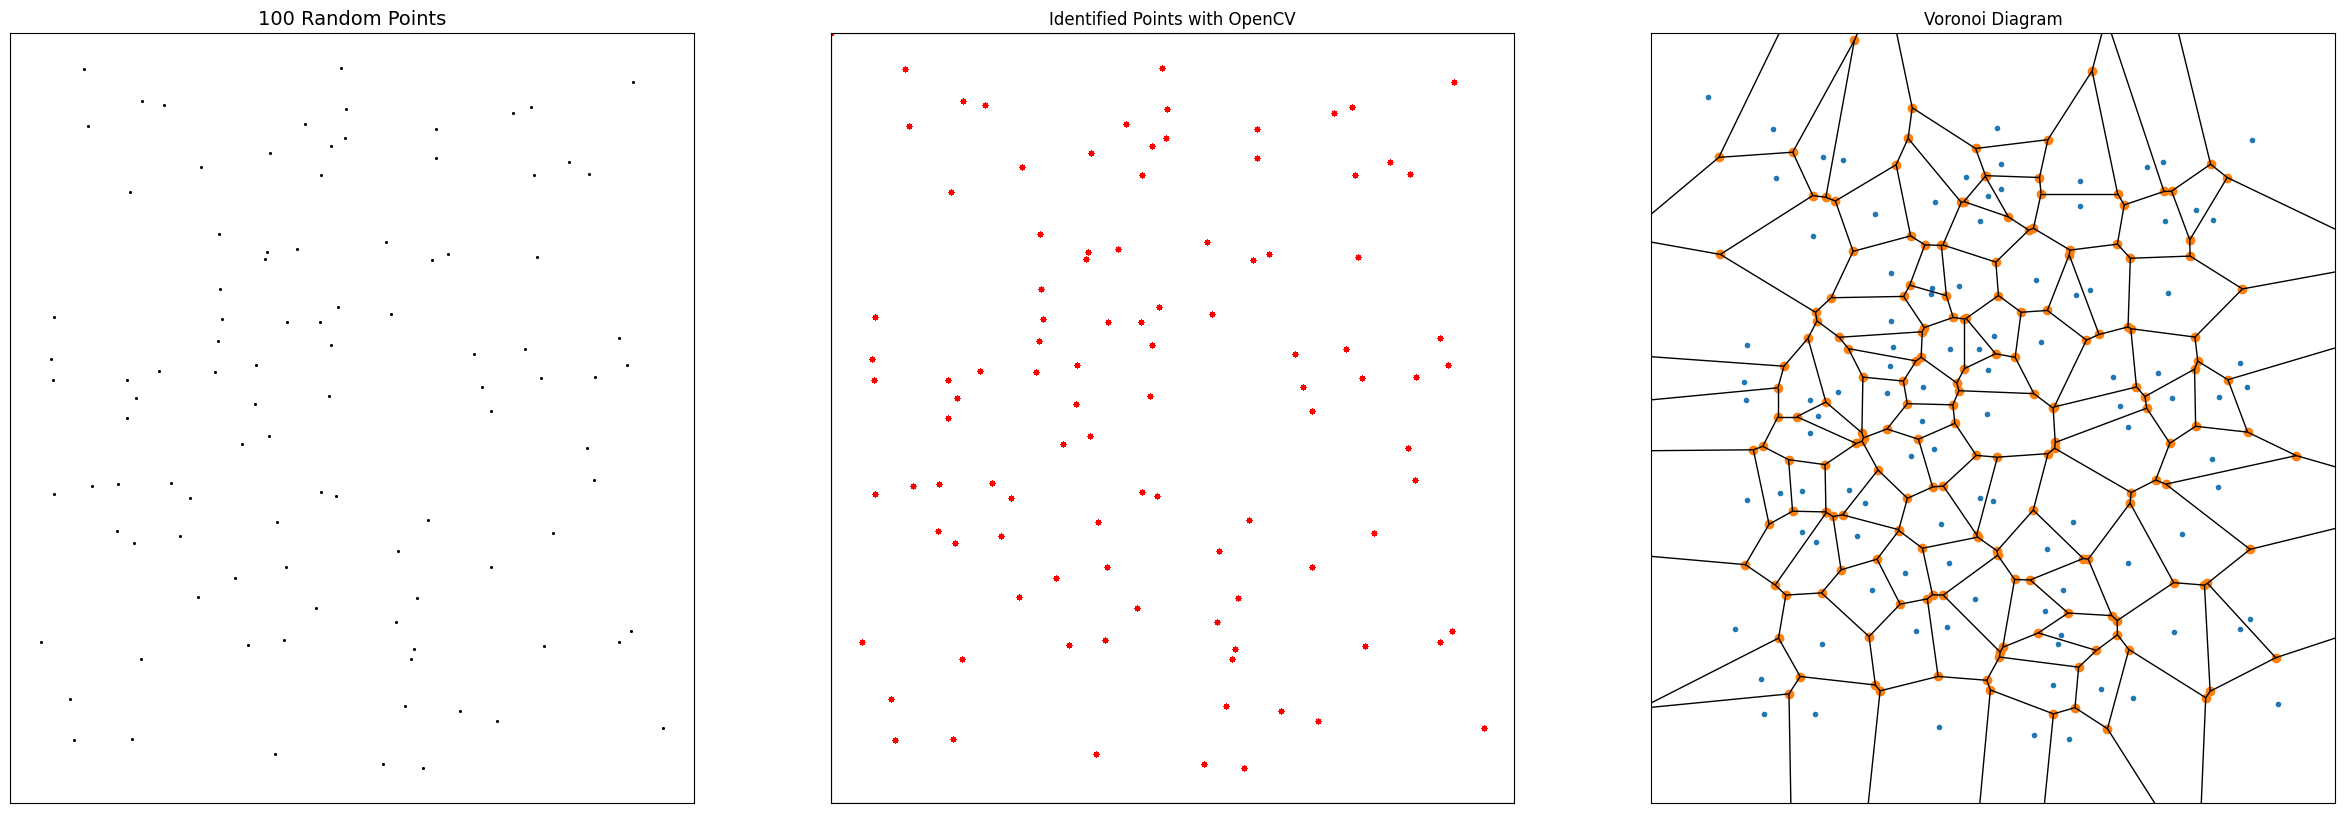

In [22]:
fig = plt.figure(figsize=(30, 10))
axs = fig.subplots(nrows=1, ncols=3) #(5+5+5)*5
ax1: plt.Axes = axs[0]
ax2: plt.Axes = axs[1]
ax3: plt.Axes = axs[2]

n_points = 100

points = rng.uniform(low=0, high=n_points*10, size=(n_points, 2))

# Turn off axis and labels
for ax in axs:
    ax.axis("off")
    ax.set_xticks([])
    ax.set_yticks([])

# Plot the points as black dots
ax1.scatter(points[:, 0], points[:, 1], s=1, c="k")
ax1.scatter(points[:, 0], points[:, 1], s=1, c="k")
ax1.set_title(f"{n_points} Random Points", fontsize=14)
ax1.invert_yaxis()

# Save the figure to the buffer
img = io.BytesIO()
extent = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig(img, bbox_inches=extent, pad_inches=0, format="png")
# Set file pointer to the beginning of the buffer
_ = img.seek(0)

# # Save the image to disk
# with open("./images/random_points.png", "wb") as f:
#     f.write(img.getbuffer())

image_cv = cv2.imdecode(np.frombuffer(img.read(), np.uint8), 1)
image_cv = cv2. cvtColor(image_cv, cv2. COLOR_BGR2GRAY)
# Threshold the image to get binary image (black points on white background)
_, binary_image = cv2.threshold(image_cv, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours of the points
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get the centers of the contours
centers = []
for contour in contours:
    M = cv2.moments(contour)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        centers.append((cx, cy))

# Draw the centers on the image
output_image = cv2.cvtColor(image_cv, cv2.COLOR_GRAY2BGR)
for center in centers:
    cv2.circle(output_image, center, 3, (0, 0, 255), -1)

# Convert BGR to RGB for displaying with matplotlib
output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

# Display the image with centers
ax2.imshow(output_image_rgb)
ax2.set_title('Identified Points with OpenCV')

# Convert the points to a numpy array
points = np.array(centers)
# Generate the Voronoi diagram
vor = Voronoi(points)
ax3.set_title("Voronoi Diagram")
voronoi_plot_2d(vor, ax=ax3)
ax3.invert_yaxis()

for ax in axs:
    ax.axis("on")
fig.savefig(f"images/voronoi{n_points}.png")